# Simple Perceptron Learning Algorithm - PLA

## Introdução

### Perceptron - Redes Neurais [ref.](https://www.monolitonimbus.com.br/perceptron-redes-neurais/)   


As Redes Neurais Artificiais (RNAs) são modelos computacionais inspirados no sistema nervoso central, ou seja, capazes de realizar o aprendizado de máquina (machine learning) e reconhecimento de padrões. O tipo mais simples de rede neural artificial foi proposto em 1958 por Frank Rosenblatt, conhecido como perceptron. A palavra em latim para o verbo compreender é “percipio“, e sua forma supina é “perceptum”, ou seja, a rede deve ser capaz de compreender o mundo exterior. Esse algoritmo de aprendizagem supervisionada considera um período de treinamento (com valores de entrada e saída) para definir se uma nova entrada pertence a alguma classe específica ou não.  

O Mark I Perceptron foi uma máquina projetada para reconhecimento de imagem e foi a primeira implementação do algoritmo. Tinha uma matriz de 400 fotocélulas, conectadas aleatoriamente aos “neurônios”. Os pesos foram codificados em potenciômetros, e as atualizações de peso durante a aprendizagem eram realizadas por motores elétricos. Atualmente, o algoritmo pode ser implantado em qualquer computador usando diversas linguagens de programação.  

O Perceptron é um classificador linear, ou seja, os problemas solucionados por ele devem ser linearmente separáveis. O gráfico a seguir mostra um conjunto de pontos bi-dimensional que pode ser separado linearmente – note que é possível passar uma linha reta entre os dois grupos de cores diferentes:  


 ![Grafico](../img/grafico_perceptron.jpg)

A separação entre as duas classe está representada por uma reta, já que é um gráfico de duas dimensões – se fossem três dimensões, seria um plano; 4 dimensões ou mais, seria um hiperplano. Ainda no gráfico, a reta define o limite entre duas regiões, por isso é chamada de função limiar. Essa função é responsável por determinar a forma e a intensidade de alteração dos valores transmitidos de um neurônio a outro. A UTCS possui uma versão online desse problema, na qual é possível incluir pontos vermelhos e azuis, recalculando-se automaticamente a melhor reta para separar os conjuntos e depois apresentando a classificação pelo algoritmo pressionando os botões “train” e “classify”.

Agora imagine se existissem dois pontos vermelhos, um em $(-1,-1)$ e outro em $(1,1)$, e dois azuis, um em $(-1,1)$ e outro em $(1,-1)$. Não teria como passar uma linha reta dividindo o gráfico em duas regiões. Esse é conhecido como “problema XOR” (“ou exclusivo”), sendo que XOR é uma operação lógica entre dois operandos que resulta em um valor lógico verdadeiro se e somente se exatamente um dos operandos possui valor verdadeiro. Esse problema pode ser solucionado com a criação de uma camada intermediária em uma rede com dois neurônios e graficamente com uma estrutura em três (ou mais) dimensões. Desse modo, é possível o uso de funções não-lineares. 

Em nossa abordagem iremos considerar o caso em que os dados são separáveis linearmente.

## 1. Criando uma função target aleatória

Para começar o experimento, uma função target aleatória será gerada. Essa função será usada como base para geração de nossa base de treinamento e testes. Esta função será gerada como um vetor com ```1 linha``` e ```3 colunas``` já que estamos trabalhando no $R_2$ e o objetivo é gerar uma target function no formato $t_1x_1 + t_2x_2 + b = 0$ onde o vetor representará $[t_1, t_2, b]$. 

Para gerar um função target aleatória será utilizado o método ```np.random.rand(<dimensions>)``` onde pode-se definir quais as dimensoes da matriz gerada. A função rand da biblioteca ```numpy``` gera números aleatórios entre $[0, 1)$. Para obter-se uma função com valores entre $-1$ e $1$ multiplica-se por $2$ e subtrai-se $1$ para que $[0,1) \to [-1,1)$.

In [13]:
import numpy as np

targetFunction = np.random.rand(3)*2 - 1

print('targetFuncion = ' + str(targetFunction))

targetFuncion = [ 0.63926317  0.2519196  -0.02247849]


Foi gerada uma função target aleatória com 3 valores que representa o formato $t_1x_1 + t_2x_2 + b = 0$ como falado anteriormente. Para ser feita a visualização desta função no $R_2$, deve-se modificar a mesma para um formato do tipo $y = ax + b$, que é o formato usual de uma reta.

Para fazer isso, será feita a manipulação do vetor $[t_1, t_2, b]$ de forma que $x_2$ seja $y$:

$$t_1x_1 + t_2x_2 + b = 0$$

$$t_2x_2 = - t_1x_1 - b$$

$$x_2 = - \frac{t_1x_1}{t_2} - \frac{b}{t_2}$$

Sendo assim, pode-se interpretar que $- t_1x_1 / t_2$ representa a inclinação da reta da target function, e que $- b / t_2$ representa o offset de $y$ da mesma para o ponto de origem $(x = 0, y = 0)$ (altura).

Logo modificando para o formato $y = ax + b$:

$$y = x_2$$

$$a = - \frac{t_1}{t_2}$$

$$b = - \frac{b}{t_2}$$

E sendo ```targetFunction =``` $[t_1, t_2, b]$:

In [14]:
targetFunctionA = - (targetFunction[0]/targetFunction[1])
targetFunctionB = - (targetFunction[2]/targetFunction[1])

print('targetFunction A = ' + str(targetFunctionA))
print('targetFunction B = ' + str(targetFunctionB))

targetFunction A = -2.53756816953
targetFunction B = 0.089228816945


Pode-se então visualizar esta target function:

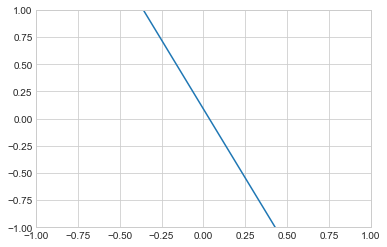

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def xInTargetFunction(x):
    return targetFunctionA*x + targetFunctionB

xValues = np.linspace(-1, 1, 100)
yValues = np.array([])

for x in xValues:
    yValues = np.append(yValues, xInTargetFunction(x))

plt.style.use('seaborn-whitegrid')
plt.plot(xValues, yValues)
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.show()


## 2. Gerando Dados a partir da função de geração (target)

Dada a função gerada, pode-se agora gerar pontos aleatórios e classificá-los a partir da mesma para gerar pontos de treinamento. A ideia aqui é gerar o conjunto $X$ matriz $(100,2)$ com pontos aleatórios $[-1,1]$ $x$ $[-1,1]$ (será utilizado o mesmo método ```numpy.random.rand``` utilizado anteriormente):

In [16]:
import numpy as np

NUMBER_OF_POINTS = 100

dataX = np.random.rand(NUMBER_OF_POINTS,2)*2 - 1

# mostrando somente primeiros 10 itens
print(str(dataX[:10]) + " \n[...]")

[[ 0.35991061 -0.45295658]
 [-0.20470264 -0.79765476]
 [ 0.4542671   0.57036428]
 [ 0.85195824 -0.91967774]
 [ 0.90697334  0.98214384]
 [-0.24174136 -0.1344646 ]
 [ 0.29680716  0.88526111]
 [ 0.17890588  0.74452719]
 [ 0.27402123  0.44181303]
 [-0.26411649 -0.70679961]] 
[...]


Classificá-los usando a função:

In [17]:
def classifica(linha, pesos):
  soma = pesos[0]*linha[0] + pesos[1]*linha[1] +  pesos[2]
  
  if (soma >= 0.0):
    return 1
  
  return 0

E gerar as labels de resultado $Y$ a partir da classificação de $X$ com a função target.

In [18]:
dataY = np.array([])

for x in dataX:
    dataY = np.append(dataY, classifica(x, targetFunction))

# mostrando somente primeiros 10 itens
print(str(dataY[:10]) + " [...]")

[ 1.  0.  1.  1.  1.  0.  1.  1.  1.  0.] [...]


Agora pode-se ver o resultado no gráfico:

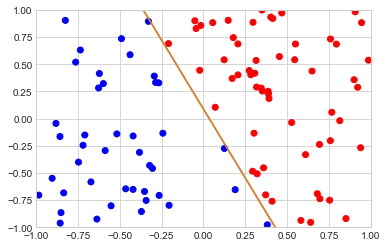

In [19]:
plt.style.use('seaborn-whitegrid')
plt.plot(xValues, yValues)

# cores a ser mostradas
yColors = np.array([])

for y in dataY:
    yColors = np.append(yColors, 'b' if y == 0 else 'r')

plt.plot(xValues, yValues)
plt.scatter(dataX.T[0], dataX.T[1],c=yColors)
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.show()

## 3. Implementando o PLA

O algoritmo de predição de um perceptron em si é muito simples. Data a função de classificação:

In [20]:
def classifica(linha, pesos):
  soma = pesos[0]*linha[0] + pesos[1]*linha[1] +  pesos[2]
  
  if (soma >= 0.0):
    return 1
  
  return 0

Cria-se um vetor $w$ com $3$ posições, nesse caso que usamos $R_2$, com valores zerados. Este vetor será utilizado para aprender-se (aproximar) a função target criada anteriormente:

In [21]:
import numpy as np

perceptronW = np.array([0,0,0])

print(perceptronW)

[0 0 0]


Para aprender a função target o algoritmo é muito simples:

1. Iterar sobre os pontos de treinamento $X_t$, para cada ponto:
2. Se classificar aquele ponto utilizando $w_t$ retorna um valor correto de acordo com $Y$, continuar; 
3. Se classificar aquele ponto utilizando $w_t$ retorna um valor incorreto de acordo com $Y$:  
   * Se $y_i$ é positivo e $classifica(x_i, w_t)$ é negativo (zero), então: $w_{t+1} \leftarrow w_t + x_i$     
   * Se $y_i$ é negativo (zero) e $classifica(x_i, w_t)$ é positivo, então: $w_{t+1} \leftarrow w_t - x_i$  
     

Algoritmo:

In [22]:
# lr = learning rate
def fit(X, TargetF, w, maxIter = -1, lr = 1):
    i = 0
    trainingW = w
    while True:
        changed = False
        i = i+1
        if maxIter > -1 and i > maxIter:
            break
        for x in X:
            pred = classifica(x, trainingW)
            exp = classifica(x, TargetF)
            

            if pred != exp:
                changed = True
                trainingW = trainingW + lr * (exp-pred) * np.append(x, 1)
        
        if changed == False:
            break
        
    
    return trainingW, i

In [23]:
fittedW, numberOfIterations = fit(dataX, targetFunction, perceptronW, 1000, 0.03)

print('fittedW:')
print(fittedW)
print('targetFunction:')
print(targetFunction)
print('quantidade de iterações até a conversão: ' + str(numberOfIterations))      

fittedW:
[ 0.45106548  0.18337603 -0.03      ]
targetFunction:
[ 0.63926317  0.2519196  -0.02247849]
quantidade de iterações até a conversão: 92


Faz-se então as transformações necessárias em ```fittedW``` para se desenhar o gráfico:

fittedW A = -2.45978432482
fittedW B = 0.163598263312


targetFunction A = -2.53756816953
targetFunction B = 0.089228816945


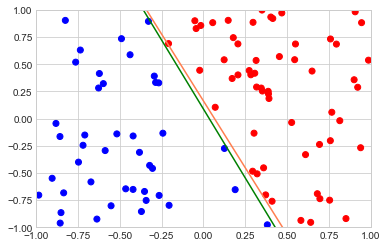

In [24]:
import matplotlib.pyplot as plt
import numpy as np

wA = - (fittedW[0]/fittedW[1])
wB = - (fittedW[2]/fittedW[1])


print('fittedW A = ' + str(wA))
print('fittedW B = ' + str(wB))
print('\n')
print('targetFunction A = ' + str(targetFunctionA))
print('targetFunction B = ' + str(targetFunctionB))

def xInFittedW(x):
    return wA*x + wB

xValues = np.linspace(-1, 1, 100)
wyValues = np.array([])

for x in xValues:
    wyValues = np.append(wyValues, xInFittedW(x))

plt.style.use('seaborn-whitegrid')
plt.plot(xValues, wyValues, c = '#FF7F50')
plt.plot(xValues, yValues, c = 'g')
plt.scatter(dataX.T[0], dataX.T[1],c=yColors)
axes = plt.gca()
axes.set_xlim([-1,1])
axes.set_ylim([-1,1])
plt.show()


No gráfico acima, a linha verde é a função $target$, e a linha laranja é a reta de classificação aprendida $w$.

Observa-se que claramente, para os dados utilizados no treinamento, o peso $w$ atinge $100\%$ de acurácia visto que este é o critério de parada. Para sabermos qual real generalização o PLA conseguiu, deve-se testar com dados não utilizados durante o treinamento. Esta estratégia será adotada na resolução dos exercícios.

## Exercícios

### O Algoritmo de Aprendizagem Perceptron (PLA)
Neste problema, você vai criar a sua funão target (alvo) $f$ e o conjunto de dados D para verificar como o Algoritmo de Aprendizagem Perceptron trabalha.

Em cada execução, escolha uma reta aleatóia no plano como sua função target $f$.

Escolha as entradas $x_n$ de uma base de dados de pontos aleatórios (uniformemente em X ), e avalie a função target em cada $x_n$ e obtenha a correspondente saída $y_n$.

Para cada execução use o Algoritmo de Aprendizagem Perceptron (PLA) para encontrar $g$. Inicie o PLA como o vetor de pesos $w$ zerado (todos os pesos iguais a zero) e em cada iteração o algoritmo deverá escolher um ponto aleatório a partir do conjunto de pontos classificados incorretamente. Nós  estamos interessados em dois valores: número de iterações que o PLA precisa para convergir a $g$, e a divergência entre $f$ e $g$ na qual $P[f(x) \neq g(x)]$ (a probabilidade que f e g vão divergir na classificação de um ponto aleatóio). Você pode calcular exatamente esta probabilidade ou você pode gerar uma aproximação gerando uma grande quantidade de conjuntos separados de pontos para estimá-la.

A fim de obter uma estimativa confiável para estes dois valores, você deve repetir o experimento por 1000 execuções (cada uma como foi especificado acima) e tomar a média sobre estas execuções. 

### Resolução

Utilizando as funções ```classifica``` e ```fit```:

In [25]:
def classifica(row, f):
    soma = f[0]*row[0] + f[1]*row[1] +  f[2]

    if (soma >= 0.0):
        return 1

    return 0

def fit(X, TargetF, w, lr = 0.05):
    i = 0
    tempW = w
    while True:
        changed = False
        i = i+1
        for x in X:
            pred = classifica(x, tempW)
            exp = classifica(x, TargetF)

            if pred != exp:
                changed = True
                tempW = tempW + lr * (exp-pred) * np.append(x, 1)
                
        # shuffle como requisitado no enunciado        
        np.random.shuffle(X)
        if changed == False:
            break

    return tempW, i

Vamos então criar uma função para auxiliar a resposta dos exercícios abaixo:

In [26]:
import numpy as np

# retorna 
#    1. número de iteracoes até a conversão 
#    2. probabilidade de erro entre f e g calculada empiricamente 
#       usando <nExperimentos> experimentos
#
# parametros
#   1. nPontos = Número de pontos gerados para cada experimento
#   2. nExperimentos = número de experimentos executados no cálculo
#
def calculaPerceptron(nPontos, nExperimentos = 1000):
    nIter = 0.0;
    errorProb = 0.0    
    
    for i in range(nExperimentos):

        # gera funcao target F entre [-1, 1)
        targetFunctionF = np.random.rand(3)*2 - 1

        # gera N pontos
        innerDataX = np.random.rand(nPontos,2)*2 - 1
        
        # inicia w com 0,0,0
        innerW = np.array([0,0,0])
        
        # fit em w e recebendo numero de iteracoes
        fittedInnerW, innerIter = fit(innerDataX, targetFunctionF, innerW)
                
        # gera N pontos para teste
        innerTestDataX = np.random.rand(nPontos,2)*2 - 1
                
        # calculando numero de erros
        errors = 0.0
        for x in innerTestDataX:
            predicted = classifica(x, fittedInnerW)
            expected =  classifica(x, targetFunctionF)
            if predicted != expected:
                errors = errors + 1.0
        
        innerErrorProb = errors / nPontos;
        
        # adicionando nIteracoes e probErros nas variáveis externas
        nIter = nIter + innerIter;
        errorProb = errorProb + innerErrorProb
            
        
    #end for
    nIter = nIter/nExperimentos;
    errorProb = errorProb/nExperimentos;
    
    return nIter, errorProb   

1. Para N = 10. Em média quantas iterações são necessárias para que o PLA convirja para N = 10 pontos treinados?  
   a) 1 (x)     
   b) 15      
   c) 300        
   d) 5000        
   e) 10000

2. Qual a opção mais se aproxima de $P[f(x) \neq g(x)]$ para $N = 10$?  
   a) 0.001     
   b) 0.01     
   c) 0.1 (x)     
   d) 0.5       
   e) 0.8  

In [27]:
numberOfIterations, errorProb = calculaPerceptron(10, 1000)

print("Número de iterações: " + str(numberOfIterations))
print("Prob de Erro: " + str(errorProb))

Número de iterações: 3.956
Prob de Erro: 0.07560000000000004


3. Agora, teste N= 100. Em média quantas iterações são necessárias para que o PLA convirja para N = 100 pontos de treinamento?   
   a) 50 (x)  
   b) 100  
   c) 500  
   d) 1000    
   e) 5000  

4. Qual a opção mais se aproxima de $P[f(x) \neq g(x)]$ para $N = 100$?  
   a) 0.001  
   b) 0.01 (x)  
   c) 0.1  
   d) 0.5    
   e) 0.8 

In [28]:
numberOfIterations, errorProb = calculaPerceptron(100, 1000)

print("Número de iterações: " + str(numberOfIterations))
print("Prob de Erro: " + str(errorProb))

Número de iterações: 21.118
Prob de Erro: 0.010489999999999921


## Conclusão

   Observa-se que o algoritmo PLA é um algoritmo facilmente implementável. A interpretação dos resultados é a de que quanto maior $N$ menor o "espaço" disponível para que o PLA convirja para uma $g$ diferente de $f$, como observado no inicio do trabalho nos gráficos mostrados.  
   
   Sendo assim, quando menor espaço para erro, menor será a probabilidade de que $g$ classifique um ponto $x_i$ de forma diferente que $f$ classifica.
   
   Então, quanto maior $N$, menor a probabilidade de que $g(x_i) \neq f(x_i)$ e maior o número de iterações necessárias para que o vetor $w$ convirja para os pontos de treinamento.